In [2]:
# https://www.machinelearningplus.com/nlp/cosine-similarity/
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
docs = {
    "trump":"Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin",
    "election":"President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election",
    "putin":"Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career",
    "soup": "Soup is a primarily liquid food, generally served warm or hot (but may be cool or cold), that is made by combining ingredients of meat or vegetables with stock, juice, water, or another liquid.",
    "noodles":"Noodles are a staple food in many cultures. They are made from unleavened dough which is stretched, extruded, or rolled flat and cut into one of a variety of shapes.",
    "dosa":"Dosa is a type of pancake from the Indian subcontinent, made from a fermented batter. It is somewhat similar to a crepe in appearance. Its main ingredients are rice and black gram."
}

In [40]:
docs.values()

dict_values(['Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin', 'President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election', 'Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career', 'Soup is a primarily liquid food, generally served warm or hot (but may be cool or cold), that is made by combining ingredients of meat or vegetables with stock, juice, water, or another liquid.', 'Noodles are a staple food in many cultures. They are made from unleavened dough which is stretched, extruded, or rolled flat and cut into one of a variety of shapes.', 'Dosa is a type of pancake from the Indian subcontinent, made from a fermented batter. It is somewhat si

In [39]:
# Create the Document Term Matrix
#count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(docs.values())
sparse_matrix

<6x107 sparse matrix of type '<class 'numpy.int64'>'
	with 145 stored elements in Compressed Sparse Row format>

### Words similar in meaning should be treated as similar. For Example, ‘President’ vs ‘Prime minister’, ‘Food’ vs ‘Dish’, ‘Hi’ vs ‘Hello’ should be considered similar. For this, converting the words into respective word vectors, and then, computing the similarities can address this problem.

In [42]:
# NOTE: It will be sooo much better to relate similarity meaning words
# See gensim -> https://radimrehurek.com/gensim/

# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=docs.keys())
display(df)
display(df[["trump","putin"]])

,after,and,another,appearance,are,as,batter,be,became,black,...,vegetables,vladimir,warm,was,water,which,who,winning,witchhunt,with
trump,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
election,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
putin,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
soup,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
noodles,0,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
dosa,0,1,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


,trump,putin
trump,2,1
election,1,2
putin,0,2
soup,0,0
noodles,0,0
dosa,0,0


In [45]:
from sklearn.metrics.pairwise import cosine_similarity as distance
#from sklearn.metrics.pairwise import euclidean_distances as distance

# Compute Cosine Similarity matrix (or selected distance)
similarity_matrix = distance(df, df)
print(similarity_matrix)

[[1.         0.51480485 0.38890873 0.10101525 0.09375    0.15386436]
 [0.51480485 1.         0.38829014 0.11886433 0.04902903 0.19312182]
 [0.38890873 0.38829014 1.         0.05714286 0.10606602 0.10444659]
 [0.10101525 0.11886433 0.05714286 1.         0.25253814 0.17407766]
 [0.09375    0.04902903 0.10606602 0.25253814 1.         0.3385016 ]
 [0.15386436 0.19312182 0.10444659 0.17407766 0.3385016  1.        ]]


,trump,election,putin,soup,noodles,dosa
trump,1.000000,0.514805,0.388909,0.101015,0.093750,0.153864
election,0.514805,1.000000,0.388290,0.118864,0.049029,0.193122
putin,0.388909,0.388290,1.000000,0.057143,0.106066,0.104447
soup,0.101015,0.118864,0.057143,1.000000,0.252538,0.174078
noodles,0.093750,0.049029,0.106066,0.252538,1.000000,0.338502
dosa,0.153864,0.193122,0.104447,0.174078,0.338502,1.000000


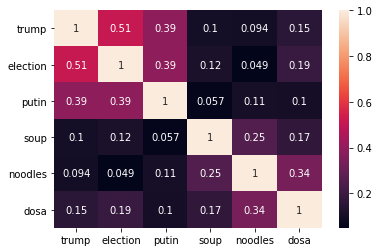

In [46]:
# Convert it to dataframe to visualize with seaborn
import seaborn as sns
sim_df = pd.DataFrame(similarity_matrix, columns=docs.keys(), index=docs.keys())
display(sim_df)
sns.heatmap(sim_df,annot=True)

In [38]:
# Max similarities of related documents
import numpy as np
np.fill_diagonal(sim_df.values, 0) # Remove diagonal max values and set those to 0
sim_df.idxmax()

trump       election
election       trump
putin          trump
soup         noodles
noodles         dosa
dosa         noodles
dtype: object